In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('../DataOut/bus_running_times_feature_added_all_moddedDF.csv')
pivot_df1 = pd.read_csv('../DataOut/bus_trip_NormCluster.csv')
pivot_df2 = pd.read_csv('../DataOut/bus_trip_TSclusters km pca.csv')
pivot_df3 = pd.read_csv('../DataOut/bus_trip_TSclusters withdtw.csv')
pivot_df4 = pd.read_csv('../DataOut/bus_trip_TSclusters no dtw.csv')

pivot_dfs=[[pivot_df1,'NormCluster'],[pivot_df2,'TSclusters km pca'],[pivot_df3,'TSclusters withdtw'],[pivot_df4,'TSclusters no dtw']]

In [3]:
# show all the columns in pandas dataframes
pd.set_option('display.max_columns', None)

In [4]:
# get a list of week_no in df
df['week_no'].unique().tolist()

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0]

In [5]:
df

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1)
0,4890.0,262.0,1.0,1.0,2021-10-01,06:39:49,06:40:58,0 days 00:01:09,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
1,4890.0,262.0,1.0,2.0,2021-10-01,06:42:12,06:45:42,0 days 00:03:30,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,74.0
2,4890.0,262.0,1.0,3.0,2021-10-01,06:45:42,06:53:58,0 days 00:08:16,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
3,4890.0,262.0,1.0,4.0,2021-10-01,06:54:04,06:57:19,0 days 00:03:15,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,6.0
4,4890.0,262.0,1.0,5.0,2021-10-01,06:57:19,06:58:56,0 days 00:01:37,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150701,3462.0,123.0,2.0,28.0,2022-10-31,18:45:44,18:47:23,0:01:39,99.0,0.8700,0.0,18.75,0.0,0,1,42.0,120.0,120.0,120.0,120.0,120.0,63.0,156.0,197.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,9.0
150702,3462.0,123.0,2.0,29.0,2022-10-31,18:47:38,18:50:23,0:02:45,165.0,1.4000,0.0,18.75,0.0,0,1,42.0,218.0,218.0,218.0,218.0,218.0,99.0,63.0,156.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0
150703,3462.0,123.0,2.0,30.0,2022-10-31,18:50:56,18:56:33,0:05:37,337.0,2.5600,0.0,18.75,0.0,0,1,42.0,391.0,391.0,391.0,391.0,391.0,165.0,99.0,63.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,33.0
150704,3462.0,123.0,2.0,31.0,2022-10-31,18:56:48,18:57:34,0:00:46,46.0,0.4200,0.0,18.75,0.0,0,1,42.0,65.0,65.0,65.0,65.0,65.0,337.0,165.0,99.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0


In [6]:
# get the number of unique date and conditions combination count in df

unique_combinations_count = df.groupby(['date', 'conditions']).size().reset_index(name='count')
unique_combinations_count


,date,conditions,count
0,2021-10-01,Overcast,54
1,2021-10-01,Partially cloudy,74
2,2021-10-01,"Rain, Overcast",61
3,2021-10-02,Partially cloudy,175
4,2021-10-02,"Rain, Overcast",31
...,...,...,...
885,2022-10-30,"Rain, Partially cloudy",37
886,2022-10-31,Overcast,241
887,2022-10-31,Partially cloudy,445
888,2022-10-31,Rain,76


In [7]:
# number of unique dates
unique_dates_count = df.groupby(['date']).size().reset_index(name='count')
unique_dates_count

,date,count
0,2021-10-01,189
1,2021-10-02,226
2,2021-10-03,127
3,2021-10-04,230
4,2021-10-05,174
...,...,...
266,2022-10-27,965
267,2022-10-28,947
268,2022-10-29,984
269,2022-10-30,419


In [8]:
# print nan values of each column
print(df.isnull().sum())

trip_id                   0
deviceid                  0
direction                 0
segment                   0
date                   1449
start_time             1449
end_time               1449
run_time               1449
run_time_in_seconds    1449
length                    0
day_of_week               0
time_of_day            1449
Sunday/holiday         1449
saturday                  0
weekday/end               0
week_no                   0
rt(w-1)                1449
rt(w-2)                1449
rt(w-3)                1449
rt(t-1)                1449
rt(t-2)                1449
rt(n-1)                 937
rt(n-2)                 479
rt(n-3)                 488
hour_of_day            1449
day                       0
month                     0
temp                   1449
precip                 1449
windspeed              1449
conditions             1449
dt(n-1)                   0
dtype: int64


In [9]:
# drop raws where run_time_in_seconds has nan values
df = df.dropna(subset=['run_time_in_seconds'])

In [10]:
selected_deviceid = pivot_dfs[1][0]['deviceid'].unique()
selected_deviceid

array([116, 117, 121, 123, 128, 209, 250, 262], dtype=int64)

In [11]:
# #drop null values
# df = df.dropna()
#drop run_time column
df.drop(['run_time'], axis=1,inplace = True)
df.drop(['end_time'], axis=1,inplace = True)

C:\Users\gw\AppData\Local\Temp\ipykernel_4368\3404374857.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['run_time'], axis=1,inplace = True)
C:\Users\gw\AppData\Local\Temp\ipykernel_4368\3404374857.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['end_time'], axis=1,inplace = True)


In [12]:
df = df[df['deviceid'].isin(selected_deviceid)]
df['deviceid'].unique()

array([262., 123., 128., 116., 117., 250., 121., 209.])

In [13]:
#unique values in conditions
print("Unique values in conditions: ", df['conditions'].unique())

Unique values in conditions:  ['Partially cloudy' 'Overcast' 'Rain, Overcast' 'Clear'
 'Rain, Partially cloudy' 'Rain']


In [14]:
df['date'] = pd.to_datetime(df['date'])
df['start_time'] = pd.to_datetime(df['start_time'],
                                   format='%H:%M:%S').dt.time


In [15]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Drop the original date column
df.drop('date', axis=1, inplace=True)

In [16]:
df['start_float'] = df['start_time'].apply(lambda x: x.hour + x.minute/60.0 + x.second/3600.0)

#drop 
df = df.drop(['start_time'], axis=1)

In [17]:
#replace ' partially cloudy' with 'partially cloudy'
df['conditions'] = df['conditions'].replace(' Partially cloudy', 'Partially cloudy')

In [18]:
df

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1),year,start_float
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.0,6.1,Partially cloudy,0.0,2021,6.663611
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.0,6.1,Partially cloudy,74.0,2021,6.703333
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.0,6.1,Partially cloudy,0.0,2021,6.761667
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.0,6.1,Partially cloudy,6.0,2021,6.901111
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.0,6.1,Partially cloudy,0.0,2021,6.955278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150701,3462.0,123.0,2.0,28.0,99.0,0.8700,0.0,18.75,0.0,0,1,42.0,120.0,120.0,120.0,120.0,120.0,63.0,156.0,197.0,18.0,31,10,22.2,0.0,4.3,Partially cloudy,9.0,2022,18.762222
150702,3462.0,123.0,2.0,29.0,165.0,1.4000,0.0,18.75,0.0,0,1,42.0,218.0,218.0,218.0,218.0,218.0,99.0,63.0,156.0,18.0,31,10,22.2,0.0,4.3,Partially cloudy,15.0,2022,18.793889
150703,3462.0,123.0,2.0,30.0,337.0,2.5600,0.0,18.75,0.0,0,1,42.0,391.0,391.0,391.0,391.0,391.0,165.0,99.0,63.0,18.0,31,10,22.2,0.0,4.3,Partially cloudy,33.0,2022,18.848889
150704,3462.0,123.0,2.0,31.0,46.0,0.4200,0.0,18.75,0.0,0,1,42.0,65.0,65.0,65.0,65.0,65.0,337.0,165.0,99.0,18.0,31,10,22.2,0.0,4.3,Partially cloudy,15.0,2022,18.946667


In [19]:
from sklearn.preprocessing import OrdinalEncoder

# Replace NaN values in the 'conditions' column with 'Unknown'
df['conditions'].fillna('Unknown', inplace=True)

conditions = ['Rain', 'Rain, Overcast', 'Rain, Partially cloudy', 'Overcast', 'Partially cloudy', 'Clear','Unknown']
encoder = OrdinalEncoder(categories=[conditions])
df['conditions_encoded'] = encoder.fit_transform(df[['conditions']])

# Now, you can drop the original 'conditions' column if needed
df = df.drop(['conditions'], axis=1)


In [20]:
# print a list of unique trip ids
trip_ids = df['trip_id'].unique()
# convert the list values to int
trip_ids = [int(x) for x in trip_ids]
print('unique trip ids: {}'.format(trip_ids))
# print length
print('length of unique trip ids: {}'.format(len(trip_ids)))

unique trip ids: [4890, 2370, 4892, 2372, 4894, 2374, 4896, 2376, 4898, 2378, 4900, 2380, 2382, 2384, 4902, 2386, 4904, 2388, 4906, 2392, 4908, 4910, 2394, 4912, 2396, 4914, 2398, 4916, 2400, 4918, 2402, 4920, 2404, 4921, 2406, 4923, 2408, 4925, 2410, 4927, 2412, 2414, 2416, 4928, 2418, 4930, 2420, 4932, 2422, 4934, 3465, 2424, 4936, 3467, 2426, 4938, 3469, 2428, 4940, 3471, 4942, 3473, 4944, 3475, 3477, 3479, 3481, 3483, 2432, 3485, 4946, 3487, 2, 4948, 3489, 4, 4950, 3491, 2433, 6, 2435, 3493, 8, 2437, 10, 2439, 12, 4952, 14, 2442, 3495, 4954, 16, 3497, 4956, 18, 2444, 3499, 4958, 20, 2446, 3501, 4960, 22, 2448, 3503, 4962, 24, 3505, 4964, 2450, 3507, 3509, 3511, 2454, 3513, 2456, 3515, 4966, 26, 3517, 4968, 3519, 4970, 28, 3521, 4972, 30, 3523, 4973, 32, 2461, 4975, 34, 2463, 4977, 36, 2465, 4979, 38, 3525, 4981, 40, 3527, 4983, 42, 3529, 4985, 44, 3531, 2471, 965, 46, 3533, 2473, 48, 3535, 2475, 3537, 2477, 3539, 3541, 2479, 4986, 50, 3543, 4988, 52, 3545, 4990, 54, 3547, 4992, 56,

# XG boost Model


In [21]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_rmse_dict = {}

def train_Model(df):
    # Split the data into two sets based on the week number for Code Block 1
    test_data = df[df['week_no'].isin([39, 40, 41, 42])]
    train_data = df[~df['week_no'].isin([39, 40, 41, 42])]

    X_train, X_test = train_data.drop(['run_time_in_seconds'], axis=1), test_data.drop(['run_time_in_seconds'], axis=1)
    y_train, y_test = train_data['run_time_in_seconds'], test_data['run_time_in_seconds']

    # Initialize XGBoost regressor for Code Block 1
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)

    # Train the model on the training data for Code Block 1
    model.fit(X_train, y_train)

    # Make predictions on the testing data for Code Block 1
    predictions = model.predict(X_test)
    
        # Create a copy of the test data and add predicted values for Code Block 2
    predicted_df = test_data.copy()
    predicted_df['predicted_run_time'] = predictions

    # Evaluate the model's performance for Code Block 1
    mae1 = mean_absolute_error(y_test, predictions)
    rmse1 = np.sqrt(mean_squared_error(y_test, predictions))
    
    
    
    return model, predictions, predicted_df, mae1, rmse1

# XG boost without clusters

In [22]:
daf_no_clus = df[df['direction'] == 1].copy()

In [23]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define features and target for Code Block 1
features1 = daf_no_clus.drop(['run_time_in_seconds'], axis=1)
target1 = daf_no_clus['run_time_in_seconds']

model1,predictions1,predicted_df1,mae1,rmse1 = train_Model(daf_no_clus)

mae_rmse_dict["without clusters"] = [mae1, rmse1]

mae_rmse_dict["skip 1"] = " "

print(f'Mean Absolute Error without cluster: {mae1}')
print(f'Root Mean Square Error  without cluster: {rmse1}')


Mean Absolute Error without cluster: 32.854974080215804
Root Mean Square Error  without cluster: 53.20377299850515


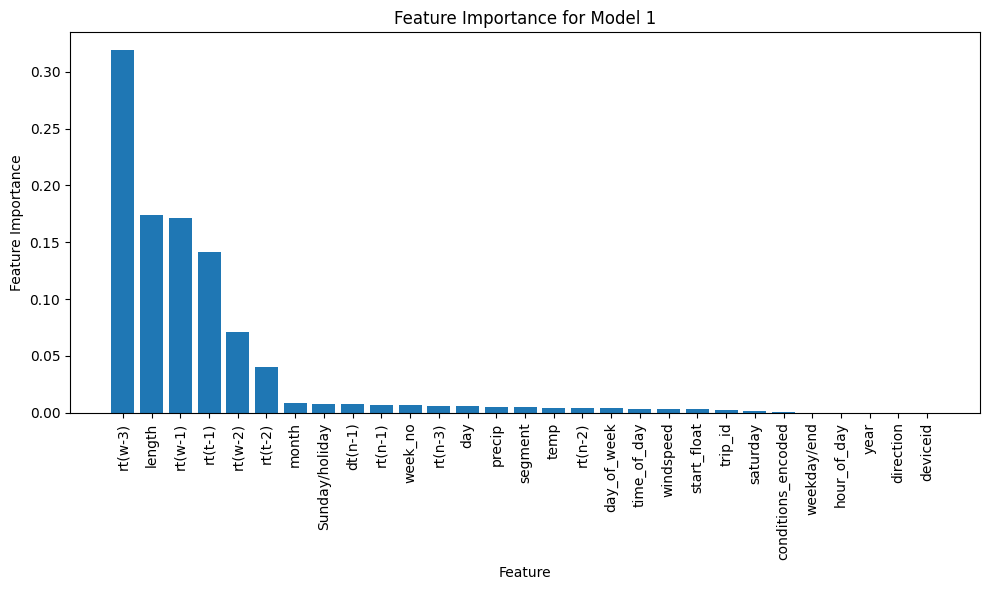

In [24]:
import matplotlib.pyplot as plt

# Get feature importances for Model 1
feature_importance1 = model1.feature_importances_

# Get the names of the features
feature_names1 = features1.columns

# Sort feature importances and feature names in descending order
sorted_idx1 = feature_importance1.argsort()[::-1]
feature_importance1 = feature_importance1[sorted_idx1]
feature_names1 = feature_names1[sorted_idx1]

# Create a bar graph for Model 1
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance1)), feature_importance1, align='center')
plt.xticks(range(len(feature_importance1)), feature_names1, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Model 1')
plt.tight_layout()
plt.show()


# XG boost with clusters

In [25]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# models dictionary
models = {}

# Loop for Code Block 2
for df_tup in pivot_dfs:
    daf_with_clus = df[df['direction'] == 1].copy()
    pivot_df = df_tup[0]
    cluster_method = df_tup[1]
    
    # Merge the dataframes using the device_id column
    new_df = pd.merge(daf_with_clus, pivot_df, on='deviceid', how='inner')
    new_df = new_df[new_df['direction'] == 1]
    
    # Define features and target for Code Block 2
    features2 = new_df.drop(['run_time_in_seconds'], axis=1)
    target2 = new_df['run_time_in_seconds']
    
    model2,predictions2,predicted_df2,mae2,rmse2 = train_Model(new_df)
    
    models[cluster_method] = model2
    
    mae_rmse_dict[f"{cluster_method} with clusters"] = [mae2, rmse2]
    mae_rmse_dict[" "] = " "
    
    print(f'Mean Absolute Error {cluster_method} : {mae2}')
    print(f'Root Mean Square Error {cluster_method} : {rmse2}')
    
mae_rmse_dict["skip 2"] = " "


Mean Absolute Error NormCluster : 33.02378993413665
Root Mean Square Error NormCluster : 53.395726987845286
Mean Absolute Error TSclusters km pca : 32.749991629882295
Root Mean Square Error TSclusters km pca : 53.16101130982849
Mean Absolute Error TSclusters withdtw : 33.38751918402585
Root Mean Square Error TSclusters withdtw : 54.30396772010321
Mean Absolute Error TSclusters no dtw : 33.06843043403192
Root Mean Square Error TSclusters no dtw : 53.840020601657585


In [26]:
#without clusters :
# Mean Absolute Error (Code Block 1): 32.854974080215804
# Root Mean Square Error (Code Block 1): 53.20377299850515

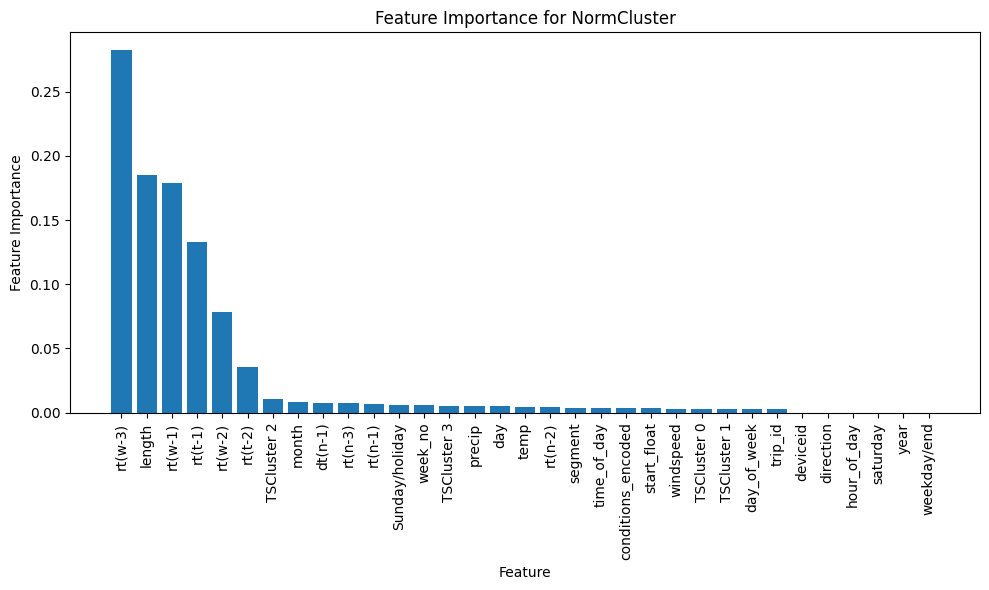

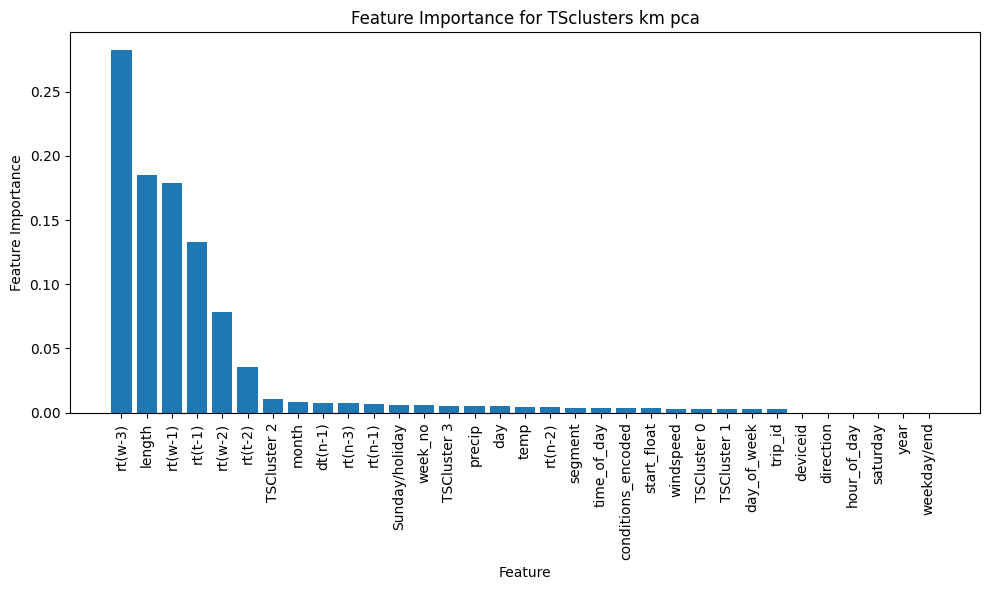

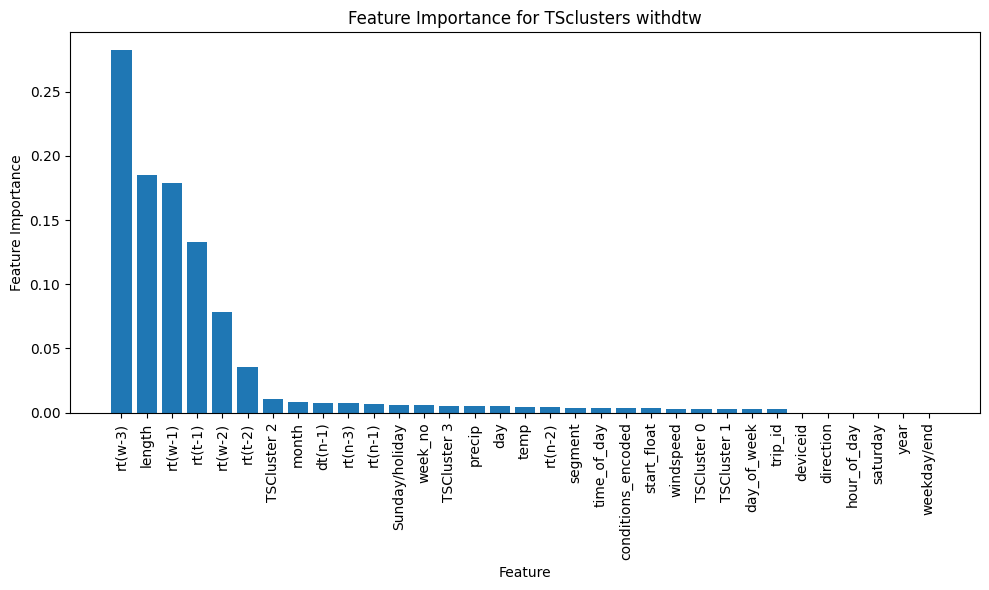

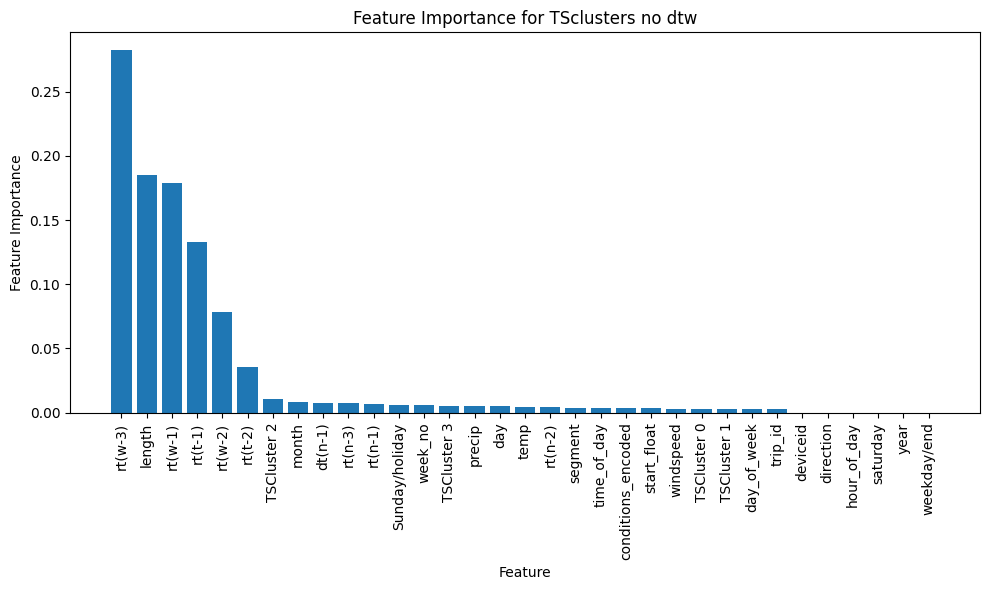

In [27]:
import matplotlib.pyplot as plt

for model in models:

    # Get feature importances for Model 2
    feature_importance2 = model2.feature_importances_

    # Get the names of the features
    feature_names2 = features2.columns

    # Sort feature importances and feature names in descending order
    sorted_idx2 = feature_importance2.argsort()[::-1]
    feature_importance2 = feature_importance2[sorted_idx2]
    feature_names2 = feature_names2[sorted_idx2]

    # Create a bar graph for Model 2
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance2)), feature_importance2, align='center')
    plt.xticks(range(len(feature_importance2)), feature_names2, rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Feature Importance')
    plt.title(f'Feature Importance for {model}')
    plt.tight_layout()
    plt.show()


In [28]:
predicted_df2.to_csv('../DataOut/runtime_with_clusters_predictions.csv', index=False)

# XG boost with new features

In [29]:
daf_with_features = df[df['direction'] == 1].copy()

In [30]:
# load csv '../DataOut/means_and_maxima_minima_counts.csv'
means_and_maxima_minima_counts = pd.read_csv('../DataOut/means_and_maxima_minima_counts.csv')

In [31]:
means_and_maxima_minima_counts

,trip_id,segment,deviceid_x,speed,acceleration,radial_acceleration,deviceid_y,throttle_count,break_count
0,2.0,0.0,116.0,6.414320,-0.073623,0.345581,116,15,13
1,2.0,1.0,116.0,7.199433,-0.227982,0.682900,116,0,0
2,2.0,2.0,116.0,8.140889,0.011076,0.469639,116,0,0
3,2.0,3.0,116.0,8.574518,-0.007302,0.435498,116,6,5
4,2.0,4.0,116.0,12.303306,-0.105420,0.376268,116,2,4
...,...,...,...,...,...,...,...,...,...
39659,5587.0,2.0,262.0,3.023758,0.166394,0.078641,262,2,1
39660,5587.0,3.0,262.0,2.221536,-0.021232,0.326771,262,10,10
39661,5587.0,4.0,262.0,2.429807,0.223977,0.200655,262,4,4
39662,5587.0,5.0,262.0,2.699783,0.393279,0.063192,262,4,3


In [32]:
# drop deviceid_x and deviceid_y columns from means_and_maxima_minima_counts
means_and_maxima_minima_counts.drop(['deviceid_x', 'deviceid_y'], axis=1, inplace=True)

In [33]:
# left join daf_with_features with means_and_maxima_minima_counts on trip_id and segment
daf_with_features = pd.merge(daf_with_features, means_and_maxima_minima_counts, on=['trip_id', 'segment'], how='left')

In [34]:
daf_with_features

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),year,start_float,conditions_encoded,speed,acceleration,radial_acceleration,throttle_count,break_count
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.000,6.1,0.0,2021,6.663611,4.0,15.118800,0.053997,1.614097,0.0,0.0
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.000,6.1,74.0,2021,6.703333,4.0,8.099356,0.005538,0.588246,3.0,1.0
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.000,6.1,0.0,2021,6.761667,4.0,7.752244,-0.003840,0.468682,6.0,6.0
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.000,6.1,6.0,2021,6.901111,4.0,15.253792,0.095992,0.415326,1.0,1.0
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.000,6.1,0.0,2021,6.955278,4.0,16.630660,0.007199,0.531797,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40742,3461.0,123.0,1.0,11.0,183.0,1.1000,0.0,17.50,0.0,0,1,42.0,172.0,166.0,156.0,242.0,116.0,194.0,39.0,94.0,17.0,31,10,25.3,0.269,0.1,0.0,2022,17.676667,1.0,13.336934,0.046796,0.835678,3.0,2.0
40743,3461.0,123.0,1.0,12.0,173.0,1.3100,0.0,17.50,0.0,0,1,42.0,183.0,170.0,172.0,142.0,150.0,183.0,194.0,39.0,17.0,31,10,25.3,0.269,0.1,10.0,2022,17.730278,1.0,11.279100,0.004636,0.613343,2.0,2.0
40744,3461.0,123.0,1.0,13.0,142.0,1.1500,0.0,17.75,0.0,0,1,42.0,149.0,149.0,161.0,149.0,134.0,173.0,183.0,194.0,17.0,31,10,25.3,0.269,0.1,2.0,2022,17.778889,1.0,12.081556,-0.177735,0.363800,1.0,2.0
40745,3461.0,123.0,1.0,14.0,121.0,0.8900,0.0,17.75,0.0,0,1,42.0,119.0,119.0,151.0,335.0,119.0,142.0,173.0,183.0,17.0,31,10,25.3,0.269,0.1,17.0,2022,17.823056,1.0,9.594620,-0.206398,0.698093,8.0,7.0


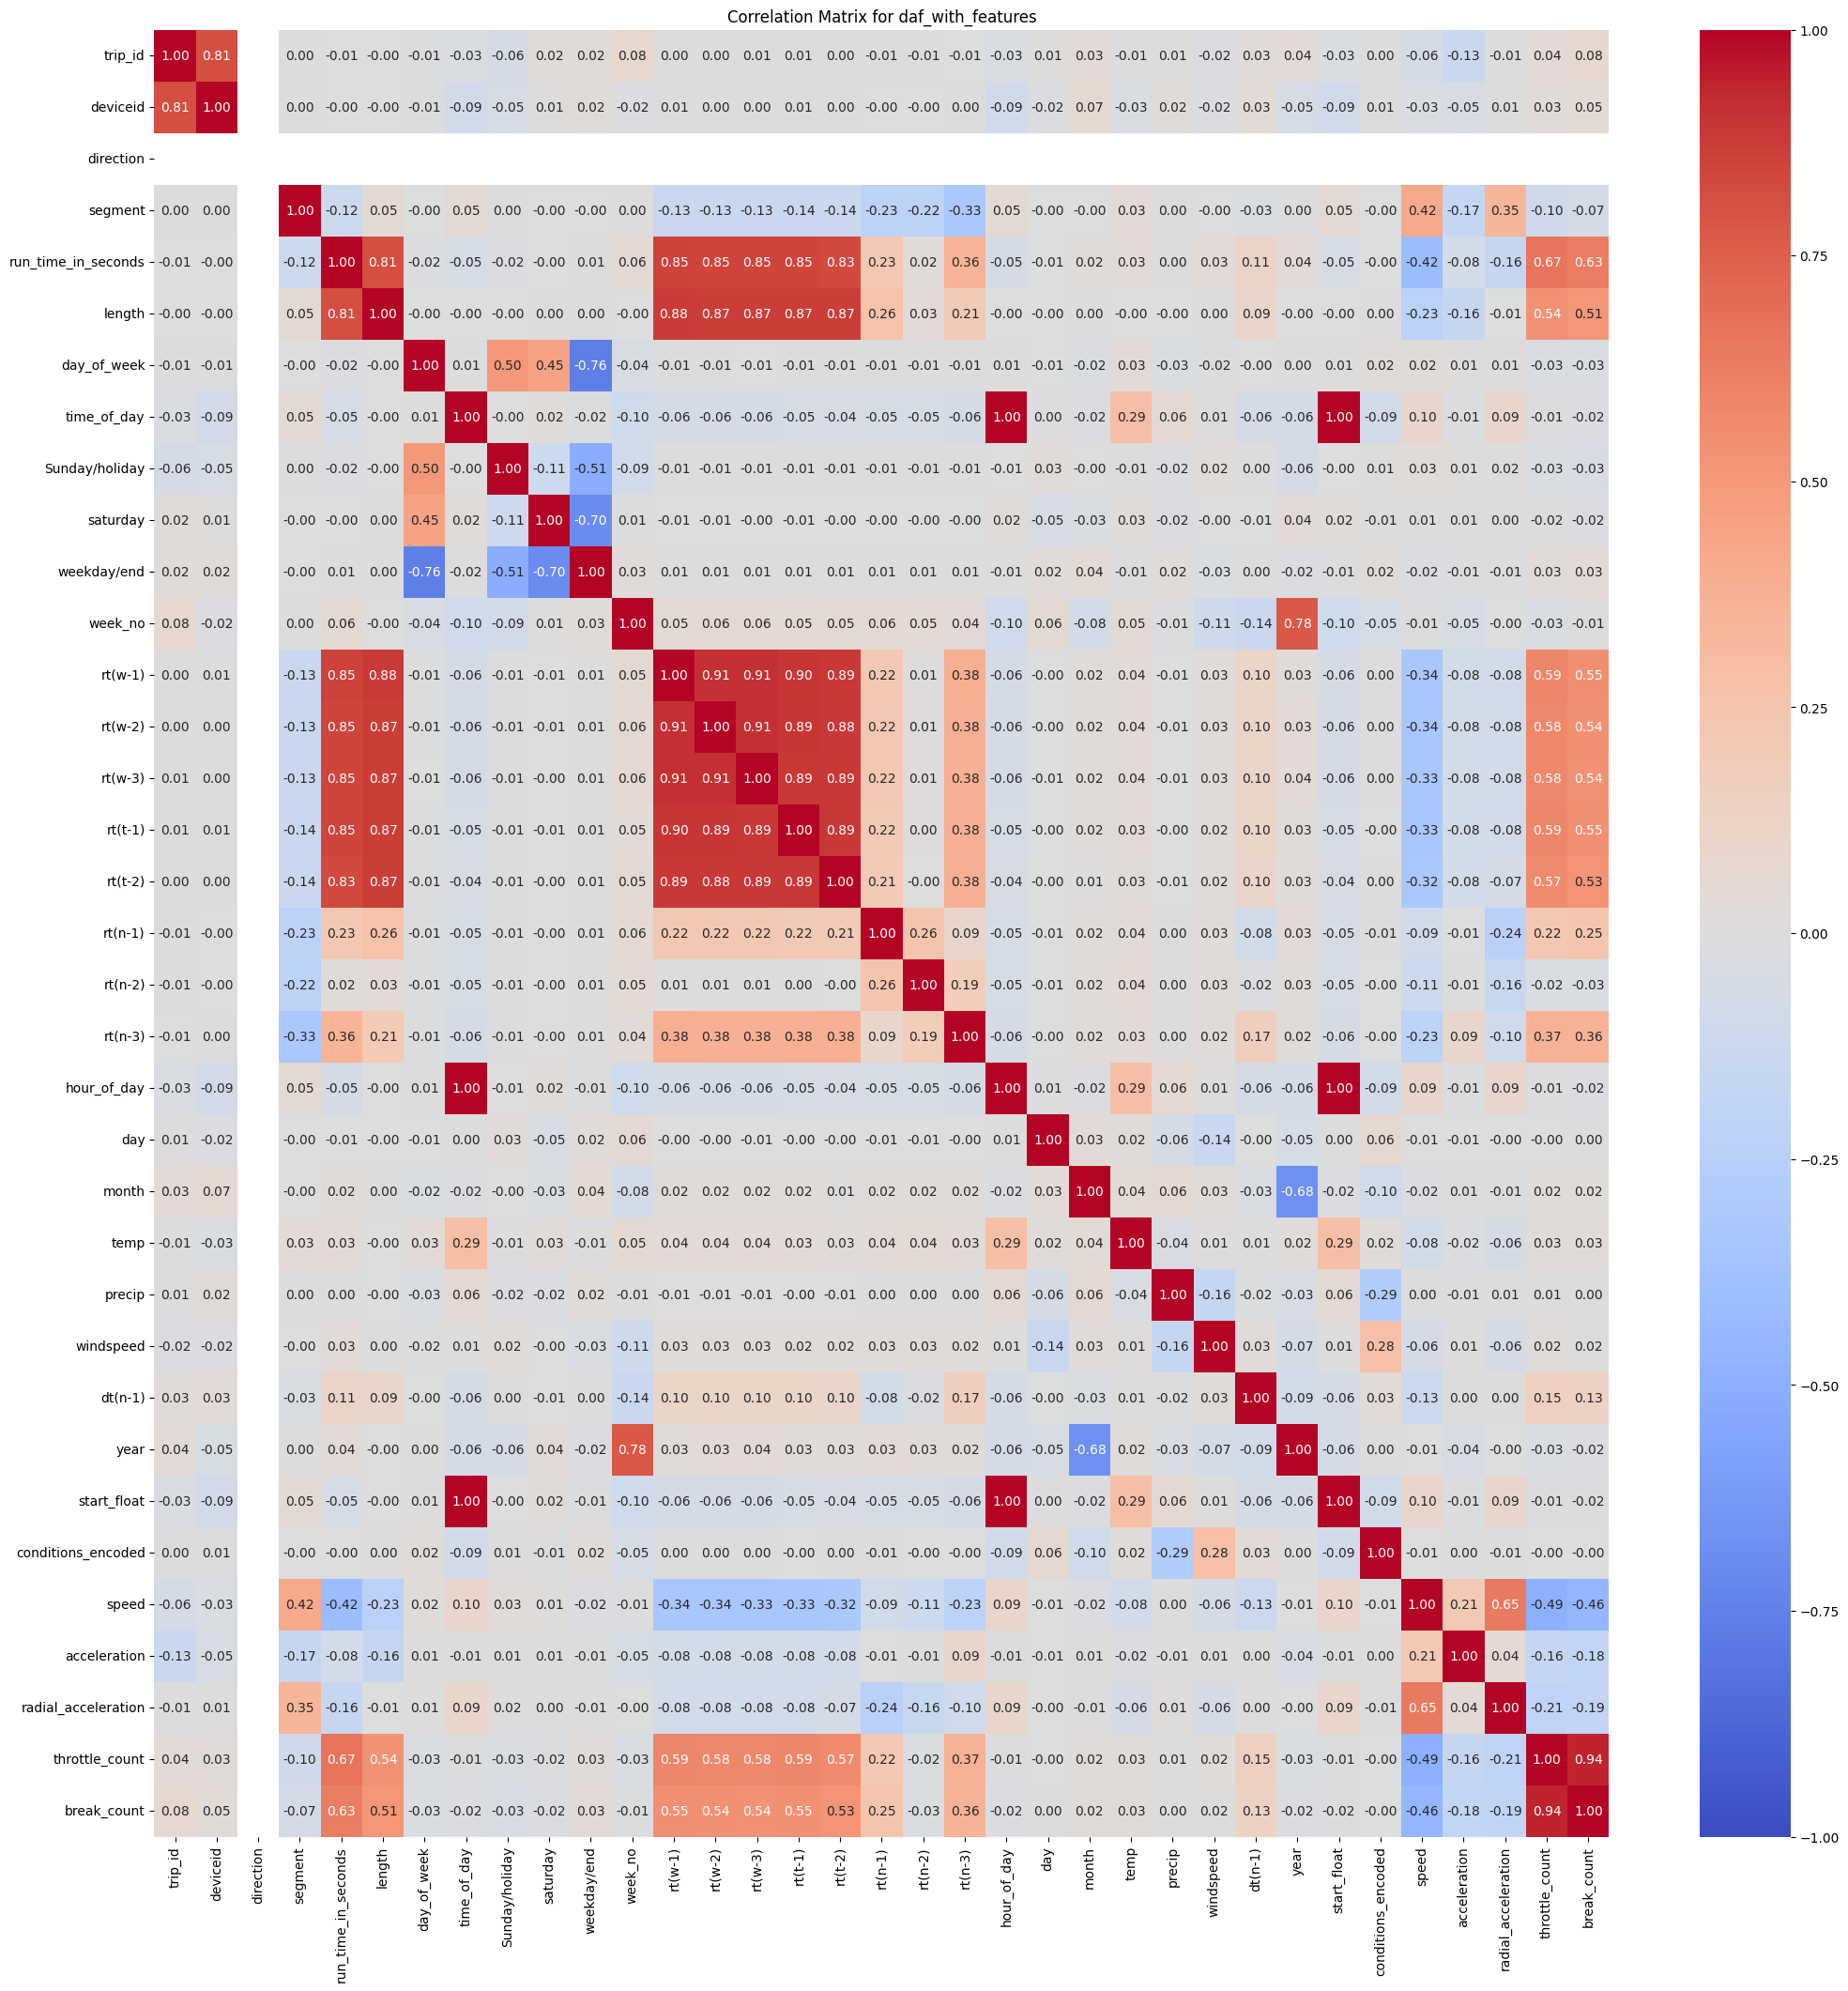

In [35]:
# visulaize a corelation matrix for daf_with_features dataframe
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = daf_with_features.corr()

# Create a heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix for daf_with_features')
plt.show()


In [36]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define features and target for Code Block 3
features3 = daf_with_features.drop(['run_time_in_seconds'], axis=1)
target3 = daf_with_features['run_time_in_seconds']

model3,predictions3,predicted_df3,mae3,rmse3 = train_Model(daf_with_features)

mae_rmse_dict["with new features"] = [mae3, rmse3]
mae_rmse_dict["skip 3"] = " "

print(f'Mean Absolute Error (Code Block 3): {mae3}')
print(f'Root Mean Square Error (Code Block 3): {rmse3}')


Mean Absolute Error (Code Block 3): 30.47981485778635
Root Mean Square Error (Code Block 3): 50.14349171515529


In [37]:
# without new features

# Mean Absolute Error (Code Block 1): 32.854974080215804
# Root Mean Square Error (Code Block 1): 53.20377299850515

# with clusters

# Mean Absolute Error TSclusters km pca : 32.749991629882295
# Root Mean Square Error TSclusters km pca : 53.16101130982849

# with new features 

# Mean Absolute Error (Code Block 3): 30.52582188898867
# Root Mean Square Error (Code Block 3): 50.935979446776805

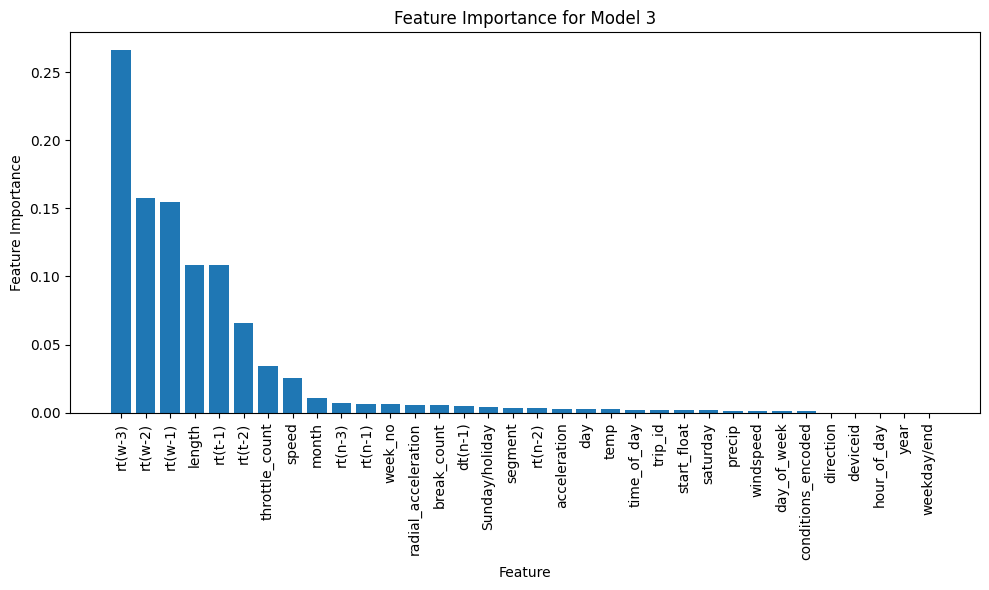

In [38]:
import matplotlib.pyplot as plt

# Get feature importances for Model 3
feature_importance3 = model3.feature_importances_

# Get the names of the features
feature_names3 = features3.columns

# Sort feature importances and feature names in descending order
sorted_idx3 = feature_importance3.argsort()[::-1]
feature_importance3 = feature_importance3[sorted_idx3]
feature_names3 = feature_names3[sorted_idx3]

# Create a bar graph for Model 3
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance3)), feature_importance3, align='center')
plt.xticks(range(len(feature_importance3)), feature_names3, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Model 3')
plt.tight_layout()
plt.show()


In [39]:
predicted_df3.to_csv('../DataOut/runtime_with_predictions.csv', index=False)

# XG boost with new features + Clusters

In [40]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# models dictionary
models2 = {}

# Loop for Code Block 4
for df_tup in pivot_dfs:
    daf_with_clus_block4 = daf_with_features.copy()
    pivot_df_block4 = df_tup[0]
    cluster_method_block4 = df_tup[1]
    
    # Merge the dataframes using the device_id column for Code Block 4
    new_df_block4 = pd.merge(daf_with_clus_block4, pivot_df_block4, on='deviceid', how='inner')
    new_df_block4 = new_df_block4[new_df_block4['direction'] == 1]
    
    # Define features and target for Code Block 4
    features_block4 = new_df_block4.drop(['run_time_in_seconds'], axis=1)
    target_block4 = new_df_block4['run_time_in_seconds']
    
    model_block4,predictions_block4,predicted_df_block4,mae_block4,rmse_block4 = train_Model(new_df_block4)
    
    mae_rmse_dict[f"with new features + {cluster_method_block4}"] = [mae3, rmse3]
    
    print(f'Mean Absolute Error {cluster_method_block4} : {mae_block4}')
    print(f'Root Mean Square Error {cluster_method_block4} : {rmse_block4}')
mae_rmse_dict["skip 4"] = " "


Mean Absolute Error NormCluster : 30.499633623795077
Root Mean Square Error NormCluster : 50.58559224316944
Mean Absolute Error TSclusters km pca : 30.321806239539928
Root Mean Square Error TSclusters km pca : 50.068112780817636
Mean Absolute Error TSclusters withdtw : 30.44130217487162
Root Mean Square Error TSclusters withdtw : 50.67337658705275
Mean Absolute Error TSclusters no dtw : 30.14091755585237
Root Mean Square Error TSclusters no dtw : 49.43892756502474


In [45]:
# print mae and rmse for all models and get the best model
best_model = None
best_mae = None
best_rmse = None
for key, value in mae_rmse_dict.items():
    if key == "skip 1" or key == "skip 2" or key == "skip 3" or key == "skip 4" or key == " ": 
        print(" ")
    else:
        print(f"{key} : MAE: {value[0]}, RMSE: {value[1]}")
        if best_model == None:
            best_model = key
            best_mae = value[0]
            best_rmse = value[1]
        else:
            if value[0] < best_mae:
                best_model = key
                best_mae = value[0]
                best_rmse = value[1]
                
print(f"Best model : {best_model} , MAE: {best_mae}, RMSE: {best_rmse}")
    
    

without clusters : MAE: 32.854974080215804, RMSE: 53.20377299850515
 
NormCluster with clusters : MAE: 33.02378993413665, RMSE: 53.395726987845286
 
TSclusters km pca with clusters : MAE: 32.749991629882295, RMSE: 53.16101130982849
TSclusters withdtw with clusters : MAE: 33.38751918402585, RMSE: 54.30396772010321
TSclusters no dtw with clusters : MAE: 33.06843043403192, RMSE: 53.840020601657585
 
with new features : MAE: 30.47981485778635, RMSE: 50.14349171515529
 
with new features + NormCluster : MAE: 30.47981485778635, RMSE: 50.14349171515529
with new features + TSclusters km pca : MAE: 30.47981485778635, RMSE: 50.14349171515529
with new features + TSclusters withdtw : MAE: 30.47981485778635, RMSE: 50.14349171515529
with new features + TSclusters no dtw : MAE: 30.47981485778635, RMSE: 50.14349171515529
 
Best model : with new features , MAE: 30.47981485778635, RMSE: 50.14349171515529


In [42]:
import matplotlib.pyplot as plt

for model in models2:

    # Get feature importances for Model 2
    feature_importance2 = model2.feature_importances_

    # Get the names of the features
    feature_names2 = features2.columns

    # Sort feature importances and feature names in descending order
    sorted_idx2 = feature_importance2.argsort()[::-1]
    feature_importance2 = feature_importance2[sorted_idx2]
    feature_names2 = feature_names2[sorted_idx2]

    # Create a bar graph for Model 2
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance2)), feature_importance2, align='center')
    plt.xticks(range(len(feature_importance2)), feature_names2, rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Feature Importance')
    plt.title(f'Feature Importance for {model}')
    plt.tight_layout()
    plt.show()
